# Lets analyze the Delaney Dataset with linear regression models #

In [8]:
#Import inital modules and libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


In [9]:
#Import and read dataframe 
df = pd.read_csv('/Users/marinamudrova/Desktop/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [10]:
#Set X and y values

X = df.drop('logS', axis=1)
y = df['logS']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

In [12]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [13]:
LR_model.n_features_in_

4

In [14]:
LR_predictions = LR_model.predict(X_test)

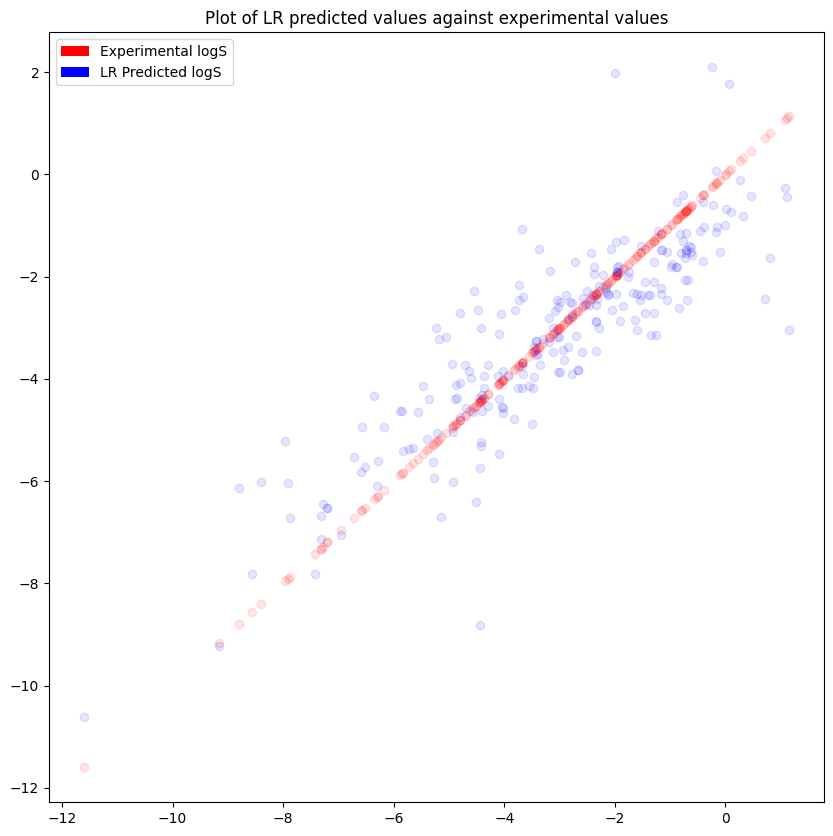

In [8]:
from matplotlib.patches import Patch

plt.figure(figsize=(10,10))

plt.scatter(x=y_test, y=y_test, alpha=0.1, c='red')
plt.scatter(x=y_test, y=LR_predictions, c='blue', alpha=0.1)


plt.title('Plot of LR predicted values against experimental values')

legend_elements = [Patch(facecolor='red', label='Experimental logS'),
                   Patch(facecolor='blue', label='LR Predicted logS')
]


plt.legend(handles=legend_elements)

plt.show()


In [9]:
print(mean_squared_error(y_test, LR_predictions))

1.1982642082101238


In [10]:
print(r2_score(y_test, LR_predictions))

0.7531930102700866


In [11]:
#LinearRegression() parameters:
'''LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)'''

p_grid = {'n_jobs' : np.arange(1, 10)
}


LR_grid = GridSearchCV(estimator=LR_model, param_grid=p_grid, cv=3)
LR_grid

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'n_jobs': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [12]:
LR_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'n_jobs': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [13]:
LR_grid_predictions = LR_grid.predict(X_test)
LR_grid_predictions

array([ -0.6032207 ,  -4.31103816,  -5.60589795,  -2.49146684,
        -3.21518586,  -7.82756749,  -5.34277946,  -2.33693945,
        -2.71064727,  -1.40739127,  -6.43980816,  -1.02856608,
        -0.39553205,  -2.32820863,  -2.88117227,  -2.10398275,
        -2.60246209,  -2.86297189,  -1.69792938,  -1.4837807 ,
        -3.18189403,  -2.36545444,  -4.39417935,  -4.74954157,
        -3.11643696,  -2.18580597,  -6.02155941,  -1.52442829,
        -1.72159649,  -1.80171573,  -3.03908551,  -1.90054764,
        -2.85080282,  -0.27247453,  -7.04619265,  -3.383852  ,
        -2.21867916,  -2.10398275,  -4.93538773,  -4.52273789,
        -3.00313777,  -1.81231324,  -1.10160742,   1.98735333,
        -4.17055164,  -2.58114974,  -1.81678899,  -3.1413949 ,
        -2.56118307,  -2.28552838,  -1.53658274,  -2.46108172,
        -4.18777578,  -3.70230109,  -1.4837807 ,  -3.73314957,
        -2.42804299,  -2.71064727,  -3.21447142,  -2.65668528,
         2.09750739,  -2.55583483,  -1.12464149,  -1.57

In [14]:
#param_n_jobs over default=1 does not affect the test score 
pd.DataFrame(LR_grid.cv_results_).iloc[:, 4:]

,param_n_jobs,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1,{'n_jobs': 1},0.781514,0.743242,0.784974,0.76991,0.01891,1
1,2,{'n_jobs': 2},0.781514,0.743242,0.784974,0.76991,0.01891,1
2,3,{'n_jobs': 3},0.781514,0.743242,0.784974,0.76991,0.01891,1
3,4,{'n_jobs': 4},0.781514,0.743242,0.784974,0.76991,0.01891,1
4,5,{'n_jobs': 5},0.781514,0.743242,0.784974,0.76991,0.01891,1
5,6,{'n_jobs': 6},0.781514,0.743242,0.784974,0.76991,0.01891,1
6,7,{'n_jobs': 7},0.781514,0.743242,0.784974,0.76991,0.01891,1
7,8,{'n_jobs': 8},0.781514,0.743242,0.784974,0.76991,0.01891,1
8,9,{'n_jobs': 9},0.781514,0.743242,0.784974,0.76991,0.01891,1


In [15]:
LR_grid.best_index_

np.int64(0)

## Lets use SVR to predict the experimental values ##

In [16]:
SVR_model = SVR(C=1)

In [17]:
SVR_model.fit(X_train, y_train)

SVR(C=1)

In [18]:
SVR_predictions = SVR_model.predict(X_test)
SVR_predictions

array([-0.98859515, -4.01176649, -5.40818744, -2.69702061, -2.00308847,
       -5.22657516, -3.70595084, -1.45341002, -1.80909098, -1.05305602,
       -4.26365636, -1.00768491, -5.78014378, -2.77963009, -3.82764935,
       -1.53900412, -2.54548518, -3.08371029, -1.1298289 , -1.29965681,
       -2.80676461, -1.77128275, -3.95316429, -4.30852869, -3.51042491,
       -2.46809069, -3.98655376, -1.23841881, -1.27440064, -1.94418414,
       -4.0789983 , -1.96514843, -2.26833794, -0.95976633, -5.53768602,
       -3.1581529 , -2.56253348, -1.53900412, -3.1293724 , -4.25295621,
       -2.08836599, -1.51849075, -2.47704183, -3.8657579 , -4.69467205,
       -2.22387492, -1.79380475, -2.41645239, -3.35931505, -1.39938045,
       -1.409179  , -2.41264401, -3.5224491 , -4.11634581, -1.29965681,
       -2.32423736, -2.77804256, -1.80909098, -2.33199294, -1.93846711,
       -4.64303417, -2.08909727, -1.03887182, -1.22297081, -4.90527356,
       -4.31351434, -3.97369284, -1.88621818, -0.76625832, -2.73

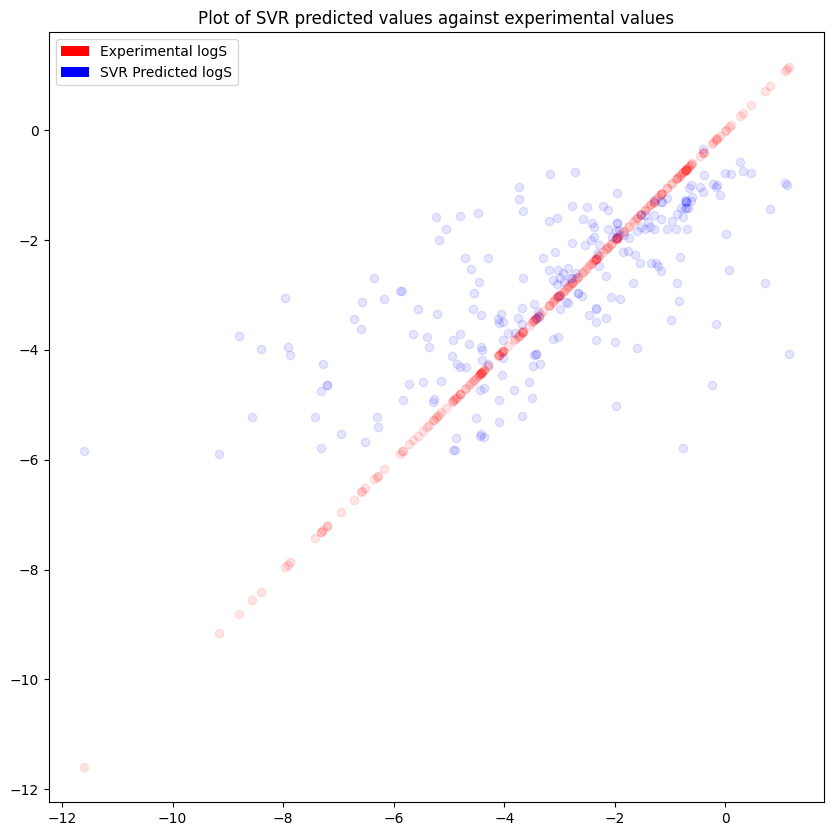

In [19]:
plt.figure(figsize=(10, 10))

plt.scatter(x=y_test, y=y_test, c='red', alpha=0.1)
plt.scatter(x=y_test, y=SVR_predictions, c='blue', alpha=0.1)

plt.title('Plot of SVR predicted values against experimental values')

legend_elements_2 = [Patch(facecolor='red', label='Experimental logS'),
                     Patch(facecolor='blue', label='SVR Predicted logS')
    
]



plt.legend(handles=legend_elements_2)

plt.show()


### Lets use GridSearchCV to optimize SVR ###

In [20]:
#SVR() parameters:

'''SVR(
    *,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)'''

p_grid_2 = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': np.logspace(-3, 3, 5),
}

#'degree': np.arange(1, 10)

SVR_grid = GridSearchCV(estimator=SVR_model, param_grid=p_grid_2, cv=3)
SVR_grid

GridSearchCV(cv=3, estimator=SVR(C=1),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [21]:
SVR_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVR(C=1),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [22]:
pd.DataFrame(SVR_grid.cv_results_).iloc[:,4:].sort_values('rank_test_score', ascending=True)

,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,0.031623,linear,"{'C': 0.03162277660168379, 'kernel': 'linear'}",7.809521e-01,7.444329e-01,7.815585e-01,7.689812e-01,1.736004e-02,1
8,1.000000,linear,"{'C': 1.0, 'kernel': 'linear'}",7.822105e-01,7.458631e-01,7.761648e-01,7.680795e-01,1.590203e-02,2
12,31.622777,linear,"{'C': 31.622776601683793, 'kernel': 'linear'}",7.567860e-01,7.400648e-01,7.715215e-01,7.561241e-01,1.285068e-02,3
14,31.622777,rbf,"{'C': 31.622776601683793, 'kernel': 'rbf'}",6.711723e-01,6.561508e-01,6.821540e-01,6.698257e-01,1.065838e-02,4
0,0.001000,linear,"{'C': 0.001, 'kernel': 'linear'}",6.530233e-01,6.590279e-01,6.928953e-01,6.683155e-01,1.755257e-02,5
18,1000.000000,rbf,"{'C': 1000.0, 'kernel': 'rbf'}",3.994564e-01,7.457393e-01,7.926602e-01,6.459520e-01,1.753481e-01,6
17,1000.000000,poly,"{'C': 1000.0, 'kernel': 'poly'}",5.803084e-01,3.826882e-01,5.446924e-01,5.025630e-01,8.600230e-02,7
13,31.622777,poly,"{'C': 31.622776601683793, 'kernel': 'poly'}",4.960829e-01,3.604701e-01,5.331763e-01,4.632431e-01,7.423252e-02,8
10,1.000000,rbf,"{'C': 1.0, 'kernel': 'rbf'}",4.360957e-01,4.152911e-01,4.735811e-01,4.416560e-01,2.411938e-02,9
6,0.031623,rbf,"{'C': 0.03162277660168379, 'kernel': 'rbf'}",3.604750e-01,3.465442e-01,3.828070e-01,3.632754e-01,1.493610e-02,10


In [23]:
SVR_grid_model = SVR_grid.best_estimator_

In [24]:
SVR_grid_predictions = SVR_grid_model.predict(X_test)
SVR_grid_predictions

array([-5.03150361e-01, -4.29285895e+00, -5.63099747e+00, -2.42385533e+00,
       -3.12924897e+00, -7.82205410e+00, -5.29373802e+00, -2.22473504e+00,
       -2.60369705e+00, -1.30701262e+00, -6.40417412e+00, -9.28758663e-01,
       -4.84018384e-01, -2.27170162e+00, -2.86123165e+00, -2.01469290e+00,
       -2.52741590e+00, -2.81341414e+00, -1.57988226e+00, -1.39007774e+00,
       -3.12159184e+00, -2.26379384e+00, -4.36014931e+00, -4.73090160e+00,
       -3.08037941e+00, -2.11175820e+00, -6.00596767e+00, -1.42694132e+00,
       -1.62690426e+00, -1.71145441e+00, -3.03625781e+00, -1.81036566e+00,
       -2.77435898e+00, -1.72284431e-01, -7.08020576e+00, -3.32736322e+00,
       -2.15462889e+00, -2.01469290e+00, -4.85995576e+00, -4.50514605e+00,
       -2.90414368e+00, -1.72021521e+00, -1.03614468e+00,  1.97689503e+00,
       -4.17302749e+00, -2.50482285e+00, -1.73224874e+00, -3.05571791e+00,
       -2.51633566e+00, -2.18868145e+00, -1.42917447e+00, -2.39103398e+00,
       -4.13677716e+00, -

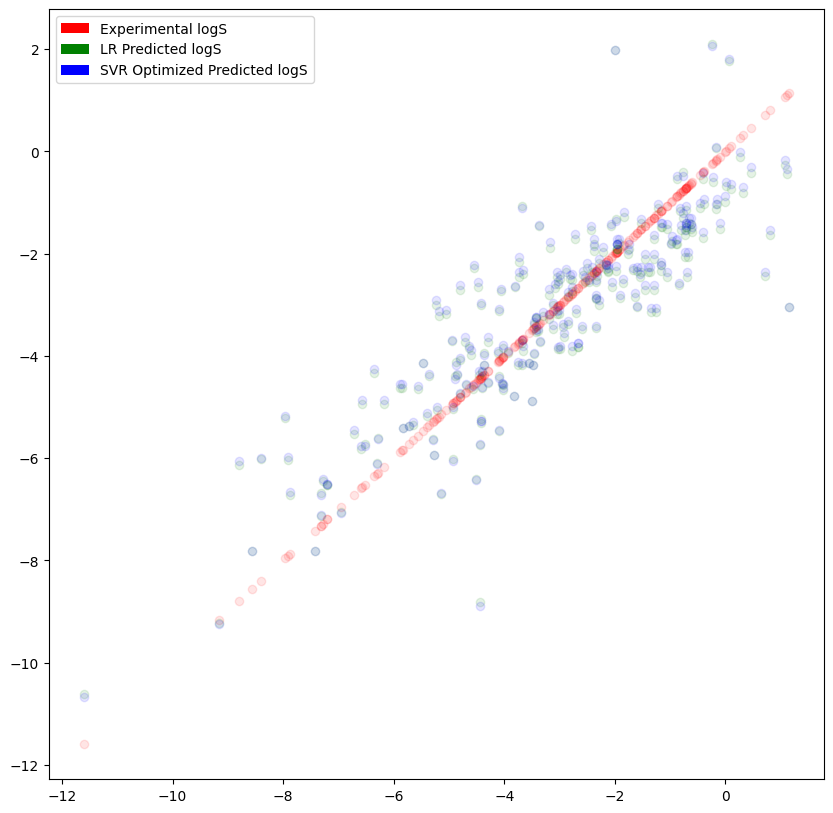

In [40]:
plt.figure(figsize=(10,10))

plt.scatter(x=y_test, y=y_test, c='red', alpha=0.1)
plt.scatter(x=y_test, y=LR_predictions, c='green', alpha=0.1)
plt.scatter(x=y_test, y=SVR_grid_predictions, c='blue', alpha=0.1)

legend_elements_3 = [Patch(facecolor='red', label='Experimental logS'),
                     Patch(facecolor='green', label='LR Predicted logS'),
                     Patch(facecolor='blue', label='SVR Optimized Predicted logS')
    
]



plt.legend(handles=legend_elements_3)

plt.show()



In [31]:
mean_squared_error(y_test, LR_predictions)

np.float64(1.1982642082101238)

In [32]:
mean_squared_error(y_test, SVR_predictions)

np.float64(2.7310652631708106)

In [33]:
mean_squared_error(y_test, SVR_grid_predictions)

np.float64(1.183408356521533)

In [34]:
r2_score(y_test, LR_predictions)

0.7531930102700866

In [35]:
r2_score(y_test, SVR_predictions)

0.43748132361730085

In [36]:
r2_score(y_test, SVR_grid_predictions)

0.7562528763747512